In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

import os
import librosa

In [21]:
mfccs = np.load('../input/nonspeech-sounds/mfccs.npy')
speaker_data = pd.read_csv('../input/nonspeech-sounds/non_signal_data.csv')

In [22]:
X = mfccs
y = speaker_data['sound']

In [23]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y,
                                                            test_size = 0.15,
                                                            stratify = y,
                                                            random_state = 42)

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                 test_size = 0.15,
                                                 stratify = y_train_val,
                                                 random_state = 42)

In [25]:
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
# First significant result scored after 10 epochs, did not really improve after another 10
# began to slightly overfit

# Epoch 10/10 loss: 0.3708 - accuracy: 0.8770 - val_loss: 0.4912 - val_accuracy: 0.8419
# model = Sequential()

# model.add(Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', padding = 'same', input_shape = (20,259,1)))
# model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
# model.add(BatchNormalization())

# model.add(Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', padding = 'same'))
# model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
# model.add(BatchNormalization())

# model.add(Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', padding = 'same'))
# model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
# model.add(BatchNormalization())
# model.add(Dropout(0.15))

# model.add(Flatten())

# model.add(Dense(32, activation = 'relu'))
# model.add(Dropout(0.15))

# model.add(Dense(32, activation = 'relu'))
# model.add(Dropout(0.15))

# model.add(Dense(6, activation = 'softmax'))

# model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data = (X_val, y_val))

In [ ]:
# added more dropout layers between convolutional layers, saw solid improvement
# not much overfitting after 20 epochs, peaked at 0.87 val accuracy - solid 0.86 after 20 epochs
# may try another dense layer for slight learning improvement

# 10 epochs: loss: 0.4603 - accuracy: 0.8485 - val_loss: 0.4844 - val_accuracy: 0.8587 (solid 0.85)
# 20 epochs: loss: 0.3254 - accuracy: 0.8925 - val_loss: 0.5000 - val_accuracy: 0.8647 (solid 0.86)
# 29 epoch: loss: 0.2625 - accuracy: 0.9118 - val_loss: 0.5175 - val_accuracy: 0.8718
# model = Sequential()

# model.add(Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', padding = 'same', input_shape = (20,259,1)))
# model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
# model.add(BatchNormalization())
# model.add(Dropout(0.15))

# model.add(Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', padding = 'same'))
# model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
# model.add(BatchNormalization())
# model.add(Dropout(0.15))

# model.add(Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', padding = 'same'))
# model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
# model.add(BatchNormalization())
# model.add(Dropout(0.15))

# model.add(Flatten())

# model.add(Dense(32, activation = 'relu'))
# model.add(Dropout(0.15))

# model.add(Dense(32, activation = 'relu'))
# model.add(Dropout(0.15))

# model.add(Dense(6, activation = 'softmax'))

# model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [27]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', padding = 'same', input_shape = (20,259,1)))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Flatten())

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.15))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.15))

model.add(Dense(6, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [28]:
model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
474/474 [==============================] - 34s 69ms/step - loss: 1.4740 - accuracy: 0.3733 - val_loss: 1.0497 - val_accuracy: 0.6095
Epoch 2/10
474/474 [==============================] - 33s 69ms/step - loss: 1.0434 - accuracy: 0.6089 - val_loss: 0.8471 - val_accuracy: 0.7119
Epoch 3/10
474/474 [==============================] - 32s 68ms/step - loss: 0.8534 - accuracy: 0.6959 - val_loss: 0.6706 - val_accuracy: 0.7840
Epoch 4/10
474/474 [==============================] - 34s 71ms/step - loss: 0.7441 - accuracy: 0.7400 - val_loss: 0.5978 - val_accuracy: 0.8132
Epoch 5/10
474/474 [==============================] - 32s 68ms/step - loss: 0.6777 - accuracy: 0.7739 - val_loss: 0.6067 - val_accuracy: 0.8064
Epoch 6/10
474/474 [==============================] - 32s 68ms/step - loss: 0.6182 - accuracy: 0.8002 - val_loss: 0.5515 - val_accuracy: 0.8240
Epoch 7/10
474/474 [==============================] - 32s 68ms/step - loss: 0.5697 - accuracy: 0.8154 - val_loss: 0.5734 - val_accuracy:

In [29]:
model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
474/474 [==============================] - 33s 69ms/step - loss: 0.4526 - accuracy: 0.8536 - val_loss: 0.5171 - val_accuracy: 0.8513
Epoch 2/10
474/474 [==============================] - 33s 70ms/step - loss: 0.4308 - accuracy: 0.8594 - val_loss: 0.4954 - val_accuracy: 0.8509
Epoch 3/10
474/474 [==============================] - 33s 70ms/step - loss: 0.4025 - accuracy: 0.8671 - val_loss: 0.4858 - val_accuracy: 0.8561
Epoch 4/10
474/474 [==============================] - 33s 70ms/step - loss: 0.3947 - accuracy: 0.8718 - val_loss: 0.4883 - val_accuracy: 0.8565
Epoch 5/10
474/474 [==============================] - 33s 70ms/step - loss: 0.3836 - accuracy: 0.8740 - val_loss: 0.5008 - val_accuracy: 0.8528
Epoch 6/10
474/474 [==============================] - 34s 71ms/step - loss: 0.3576 - accuracy: 0.8798 - val_loss: 0.4969 - val_accuracy: 0.8602
Epoch 7/10
474/474 [==============================] - 34s 72ms/step - loss: 0.3584 - accuracy: 0.8833 - val_loss: 0.4685 - val_accuracy:

In [30]:
model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
474/474 [==============================] - 33s 71ms/step - loss: 0.3067 - accuracy: 0.8989 - val_loss: 0.4772 - val_accuracy: 0.8700
Epoch 2/10
474/474 [==============================] - 34s 71ms/step - loss: 0.3145 - accuracy: 0.8972 - val_loss: 0.4894 - val_accuracy: 0.8617
Epoch 3/10
474/474 [==============================] - 33s 70ms/step - loss: 0.2995 - accuracy: 0.9006 - val_loss: 0.5020 - val_accuracy: 0.8550
Epoch 4/10
474/474 [==============================] - 33s 70ms/step - loss: 0.2829 - accuracy: 0.9040 - val_loss: 0.5372 - val_accuracy: 0.8606
Epoch 5/10
474/474 [==============================] - 33s 69ms/step - loss: 0.2889 - accuracy: 0.9042 - val_loss: 0.5256 - val_accuracy: 0.8602
Epoch 6/10
474/474 [==============================] - 34s 72ms/step - loss: 0.2737 - accuracy: 0.9102 - val_loss: 0.5581 - val_accuracy: 0.8584
Epoch 7/10
474/474 [==============================] - 33s 69ms/step - loss: 0.2702 - accuracy: 0.9110 - val_loss: 0.4948 - val_accuracy:

In [11]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size= (3,3), activation = 'relu', padding = 'same', input_shape = (20,259,1)))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Flatten())

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.15))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.15))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.15))

model.add(Dense(6, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
474/474 [==============================] - 58s 120ms/step - loss: 1.4573 - accuracy: 0.3934 - val_loss: 0.9326 - val_accuracy: 0.6648
Epoch 2/10
474/474 [==============================] - 56s 117ms/step - loss: 0.9727 - accuracy: 0.6594 - val_loss: 0.7346 - val_accuracy: 0.7511
Epoch 3/10
474/474 [==============================] - 55s 115ms/step - loss: 0.7825 - accuracy: 0.7378 - val_loss: 0.5518 - val_accuracy: 0.8225
Epoch 4/10
474/474 [==============================] - 56s 118ms/step - loss: 0.6817 - accuracy: 0.7801 - val_loss: 0.5579 - val_accuracy: 0.8296
Epoch 5/10
474/474 [==============================] - 56s 117ms/step - loss: 0.6163 - accuracy: 0.7988 - val_loss: 0.5124 - val_accuracy: 0.8345
Epoch 6/10
474/474 [==============================] - 56s 117ms/step - loss: 0.5784 - accuracy: 0.8157 - val_loss: 0.5464 - val_accuracy: 0.8356
Epoch 7/10
474/474 [==============================] - 55s 116ms/step - loss: 0.5468 - accuracy: 0.8219 - val_loss: 0.5072 - val_ac

In [13]:
model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
474/474 [==============================] - 56s 119ms/step - loss: 0.4485 - accuracy: 0.8567 - val_loss: 0.4835 - val_accuracy: 0.8558
Epoch 2/10
474/474 [==============================] - 56s 118ms/step - loss: 0.4309 - accuracy: 0.8606 - val_loss: 0.4489 - val_accuracy: 0.8651
Epoch 3/10
474/474 [==============================] - 56s 119ms/step - loss: 0.4306 - accuracy: 0.8603 - val_loss: 0.5240 - val_accuracy: 0.8442
Epoch 4/10
474/474 [==============================] - 56s 119ms/step - loss: 0.4044 - accuracy: 0.8711 - val_loss: 0.4772 - val_accuracy: 0.8509
Epoch 5/10
474/474 [==============================] - 56s 118ms/step - loss: 0.3971 - accuracy: 0.8724 - val_loss: 0.4697 - val_accuracy: 0.8640
Epoch 6/10
474/474 [==============================] - 56s 118ms/step - loss: 0.3738 - accuracy: 0.8799 - val_loss: 0.4932 - val_accuracy: 0.8475
Epoch 7/10
474/474 [==============================] - 55s 117ms/step - loss: 0.3735 - accuracy: 0.8802 - val_loss: 0.4777 - val_ac

In [14]:
model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
474/474 [==============================] - 58s 122ms/step - loss: 0.3336 - accuracy: 0.8928 - val_loss: 0.4932 - val_accuracy: 0.8584
Epoch 2/10
474/474 [==============================] - 61s 129ms/step - loss: 0.3294 - accuracy: 0.8928 - val_loss: 0.5021 - val_accuracy: 0.8617
Epoch 3/10
474/474 [==============================] - 59s 124ms/step - loss: 0.3248 - accuracy: 0.8955 - val_loss: 0.5099 - val_accuracy: 0.8640
Epoch 4/10
474/474 [==============================] - 57s 121ms/step - loss: 0.3105 - accuracy: 0.9017 - val_loss: 0.5347 - val_accuracy: 0.8543
Epoch 5/10
474/474 [==============================] - 57s 120ms/step - loss: 0.3022 - accuracy: 0.9048 - val_loss: 0.5455 - val_accuracy: 0.8558
Epoch 6/10
474/474 [==============================] - 56s 119ms/step - loss: 0.2996 - accuracy: 0.9040 - val_loss: 0.4940 - val_accuracy: 0.8640
Epoch 7/10
474/474 [==============================] - 56s 118ms/step - loss: 0.2877 - accuracy: 0.9052 - val_loss: 0.5067 - val_ac

In [26]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size= (3,3), activation = 'relu', padding = 'same', input_shape = (20,259,1)))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size= (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(6, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [27]:
model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
474/474 [==============================] - 5s 9ms/step - loss: 1.6806 - accuracy: 0.2451 - val_loss: 1.4372 - val_accuracy: 0.3221
Epoch 2/10
474/474 [==============================] - 4s 8ms/step - loss: 1.5018 - accuracy: 0.3175 - val_loss: 1.3410 - val_accuracy: 0.4107
Epoch 3/10
474/474 [==============================] - 4s 8ms/step - loss: 1.3815 - accuracy: 0.3883 - val_loss: 1.2907 - val_accuracy: 0.5108
Epoch 4/10
474/474 [==============================] - 4s 8ms/step - loss: 1.2147 - accuracy: 0.5236 - val_loss: 0.9400 - val_accuracy: 0.7078
Epoch 5/10
474/474 [==============================] - 4s 8ms/step - loss: 1.0473 - accuracy: 0.6116 - val_loss: 0.8358 - val_accuracy: 0.7093
Epoch 6/10
474/474 [==============================] - 4s 8ms/step - loss: 0.9475 - accuracy: 0.6488 - val_loss: 0.7713 - val_accuracy: 0.7470
Epoch 7/10
474/474 [==============================] - 4s 8ms/step - loss: 0.8734 - accuracy: 0.6831 - val_loss: 0.6944 - val_accuracy: 0.7627
Epoch 

In [28]:
model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
474/474 [==============================] - 4s 9ms/step - loss: 0.6772 - accuracy: 0.7748 - val_loss: 0.5324 - val_accuracy: 0.8225
Epoch 2/10
474/474 [==============================] - 4s 8ms/step - loss: 0.6474 - accuracy: 0.7841 - val_loss: 0.5433 - val_accuracy: 0.8408
Epoch 3/10
474/474 [==============================] - 4s 9ms/step - loss: 0.6092 - accuracy: 0.8023 - val_loss: 0.5318 - val_accuracy: 0.8483
Epoch 4/10
474/474 [==============================] - 4s 8ms/step - loss: 0.5920 - accuracy: 0.8078 - val_loss: 0.4687 - val_accuracy: 0.8520
Epoch 5/10
474/474 [==============================] - 4s 8ms/step - loss: 0.5495 - accuracy: 0.8230 - val_loss: 0.4454 - val_accuracy: 0.8591
Epoch 6/10
474/474 [==============================] - 4s 9ms/step - loss: 0.5294 - accuracy: 0.8316 - val_loss: 0.4801 - val_accuracy: 0.8494
Epoch 7/10
474/474 [==============================] - 4s 8ms/step - loss: 0.5168 - accuracy: 0.8381 - val_loss: 0.4478 - val_accuracy: 0.8535
Epoch 

In [29]:
model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
474/474 [==============================] - 4s 8ms/step - loss: 0.4616 - accuracy: 0.8556 - val_loss: 0.4662 - val_accuracy: 0.8714
Epoch 2/10
474/474 [==============================] - 4s 8ms/step - loss: 0.4490 - accuracy: 0.8561 - val_loss: 0.4403 - val_accuracy: 0.8643
Epoch 3/10
474/474 [==============================] - 4s 9ms/step - loss: 0.4396 - accuracy: 0.8595 - val_loss: 0.5258 - val_accuracy: 0.8483
Epoch 4/10
474/474 [==============================] - 4s 8ms/step - loss: 0.4310 - accuracy: 0.8666 - val_loss: 0.4820 - val_accuracy: 0.8662
Epoch 5/10
474/474 [==============================] - 4s 8ms/step - loss: 0.4166 - accuracy: 0.8697 - val_loss: 0.4623 - val_accuracy: 0.8685
Epoch 6/10
474/474 [==============================] - 4s 9ms/step - loss: 0.4123 - accuracy: 0.8698 - val_loss: 0.4790 - val_accuracy: 0.8673
Epoch 7/10
474/474 [==============================] - 4s 8ms/step - loss: 0.4084 - accuracy: 0.8722 - val_loss: 0.4649 - val_accuracy: 0.8655
Epoch 

In [30]:
pred_probs = model.predict(X_test)

In [31]:
class_preds = np.argmax(pred_probs, axis = 1)

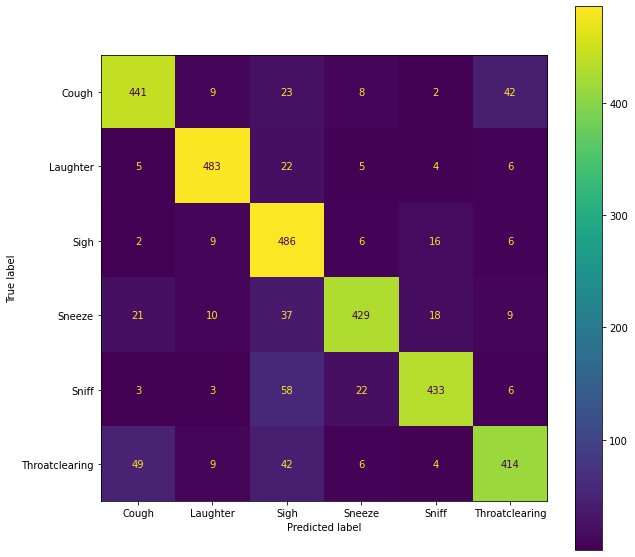

In [32]:
sound_label = ['Cough', 'Laughter', 'Sigh', 'Sneeze', 'Sniff', 'Throatclearing']

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(y_test, class_preds, ax = ax, display_labels = sound_label);

We see that our model performes generally well. Understandably, it has a little trouble with coughs and throat clearing, with more mistakes specifically in classifying a throat clear as a cough.

There are not any labels in which our model is nearly flawless in. This is also unsurprising as there were a number of erroneous audio files (mislabelled, no sound, or unrelated sound). Achieving an accuracy of ~86-87% despite these erroneous files seems respectable.

## Read In My Own Files

In [33]:
my_sound_files = os.listdir('../input/mysounds')
my_sound_signals = []

for file in my_sound_files:
    signal, sr = librosa.load('../input/mysounds/' + file, duration = 6)
    signal_size = len(signal)
    amount_to_pad = 132300 - signal_size
    padded_signal = np.pad(signal, pad_width= (0,amount_to_pad), mode = 'constant')
    my_sound_signals.append(padded_signal)

/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [34]:
my_mfccs = []

for padded_signal in my_sound_signals:
    mfcc = librosa.feature.mfcc(y = padded_signal, n_fft = 2048, n_mfcc = 20, hop_length = 512)
    my_mfccs.append(mfcc)
    
my_mfccs = np.array(my_mfccs)[..., np.newaxis]

In [35]:
my_mfccs.shape

(5, 20, 259, 1)

In [36]:
my_pred_probs = model.predict(my_mfccs)
my_pred_classes = np.argmax(my_pred_probs, axis = 1)

In [37]:
my_pred_classes

array([1, 5, 4, 5, 2])

In [38]:
my_sound_files

['Laugh.m4a',
 'ThroatClear.m4a',
 'Sniff.m4a',
 'CoughWithThroatClear.m4a',
 'Sigh.m4a']

In [39]:
sound_label = ['Cough', 'Laughter', 'Sigh', 'Sneeze', 'Sniff', 'Throatclearing']


## What Next

More sounds like yawns, grunts?